## **선행 학습**

[1. Matrix_Vector](https://github.com/ancestor9/Mathematics-for-Machine-Learning-and-Data-Science-Specialization/tree/main/Course-1/Week-3)
- 벡터와 행렬 연산
- 선형변환과 내적
- Quiz

[2. Tensors](https://docs.pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)
- tensor ?

[3. Perceptron](https://en.wikipedia.org/wiki/Perceptron)
- Perceptron을 행렬과 벡터 선형대수 연산으로 이해하기

[4. Deep Learning Mechanism](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)
- 입력데이터(Input Layer), Hidden Layer, Output Layer
- 딥려닝 모델 구성
- 최적화, backpropagation 학습

[5. Stochastic Gradient Descent](https://github.com/ancestor9/ADSP-Crash-Course/blob/main/ADSP_%EA%B3%84%EC%82%B0%EB%AC%B8%EC%A0%9C.xlsx)
- 최적화 경사하강 알고리즘 엑셀로 이해하기

[6. Autogard (자동미분)](https://docs.pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)

- 아래 코드 (맨 뒤의 예제를 이해한 수행해도 OK)
- 파이토치(PyTorch)의 핵심 엔진인 **자동 미분(Autograd)** 과 **연산 그래프(Computational Graph)** 의 동작 원리

In [42]:
# For tips on running notebooks in Google Colab, see
# https://docs.pytorch.org/tutorials/beginner/colab
%matplotlib inline

[Learn the Basics](intro.html) \|\|
[Quickstart](quickstart_tutorial.html) \|\|
[Tensors](tensorqs_tutorial.html) \|\| [Datasets &
DataLoaders](data_tutorial.html) \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\| **Autograd** \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Automatic Differentiation with `torch.autograd`
===============================================

When training neural networks, the most frequently used algorithm is
**back propagation**. In this algorithm, parameters (model weights) are
adjusted according to the **gradient** of the loss function with respect
to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation
engine called `torch.autograd`. It supports automatic computation of
gradient for any computational graph.

Consider the simplest one-layer neural network, with input `x`,
parameters `w` and `b`, and some loss function. It can be defined in
PyTorch in the following manner:


In [43]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [44]:
w

tensor([[-1.0426,  1.4620,  1.3717],
        [-2.6802,  1.0042, -0.1826],
        [-0.0396, -0.2980,  1.0363],
        [-2.3188, -0.4678, -0.8682],
        [-0.6624,  0.6986, -0.4277]], requires_grad=True)

In [45]:
b

tensor([ 0.8199, -0.5474, -1.9508], requires_grad=True)

### Quize. simplest one-layer neural network를 종이위에 그려라

Tensors, Functions and Computational graph
==========================================

This code defines the following **computational graph**:

![](https://pytorch.org/tutorials/_static/img/basics/comp-graph.png)

In this network, `w` and `b` are **parameters**, which we need to
optimize. Thus, we need to be able to compute the gradients of loss
function with respect to those variables. In order to do that, we set
the `requires_grad` property of those tensors.


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>You can set the value of <code>requires_grad</code> when creating atensor, or later by using <code>x.requires_grad_(True)</code> method.</p>

</div>



A function that we apply to tensors to construct computational graph is
in fact an object of class `Function`. This object knows how to compute
the function in the *forward* direction, and also how to compute its
derivative during the *backward propagation* step. A reference to the
backward propagation function is stored in `grad_fn` property of a
tensor. You can find more information of `Function` [in the
documentation](https://pytorch.org/docs/stable/autograd.html#function).


In [46]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7b2891e580d0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7b2891ff0e20>


- requires_grad=True: 가중치 $w$와 $b$에 이 설정을 하는 이유는, 나중에 오차를 줄이기 위해 어느 방향으로 수정해야 할지(미분값)를 계산해야 하기 때문

>> grad_fn: 파이토치는 연산을 수행할 때마다 그 연산의 '역연산'이 무엇인지 기억합니다.

>>> $z$는 더하기 연산을 통해 만들어졌으므로 <AddBackward0 object at 0x7b28962a2c50>가 붙고,

>>> loss는 이진 교차 엔트로피(CE, cross entropyh) 연산을 통해 만들어졌으므로 <BinaryCrossEntropyWithLogitsBackward0 object at 0x7b2896343400>가 연결된 것

Computing Gradients
===================

To optimize weights of parameters in the neural network, we need to
compute the derivatives of our loss function with respect to parameters,
namely, we need $\frac{\partial loss}{\partial w}$ and
$\frac{\partial loss}{\partial b}$ under some fixed values of `x` and
`y`. To compute those derivatives, we call `loss.backward()`, and then
retrieve the values from `w.grad` and `b.grad`:


In [47]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0009, 0.2881, 0.0883],
        [0.0009, 0.2881, 0.0883],
        [0.0009, 0.2881, 0.0883],
        [0.0009, 0.2881, 0.0883],
        [0.0009, 0.2881, 0.0883]])
tensor([0.0009, 0.2881, 0.0883])


- Auto.grad(미분값_ 계산: loss.backward()학습의 핵심 단계

>> **loss.backward()** 를 호출하면 오차로부터 시작해 거꾸로(Backward) 돌아가며 각 파라미터($w, b$)가 오차에 얼마나 영향을 주었는지 계산

>>> w.grad와 b.grad: 계산이 끝나면 이 변수들에 미분값(기울기)이 저장됩니다. 이 값을 보고 'Adam' 같은 옵티마이저가 가중치를 수정하게 됩니다.

- 특이사항

>> 리프 노드(Leaf Node)만 미분값 보관:그래프의 끝단에 있는(사용자가 직접 만든) w나 b 같은 변수들만 grad 속성을 가질 수 있습니다. 연산 중간에 생성된 z 같은 변수의 미분값은 메모리 절약을 위해 보통 저장되지 않습니다.

>> backward()는 한 번만 가능:기본적으로 backward()를 한 번 실행하면 계산에 사용된 그래프 메모리가 해제되며 만약 동일한 그래프에서 미분값을 여러 번 계산해야 한다면 retain_graph=True라는 옵션을 주어야 함

### 💡 요약
- **"정답과 비교해서(CE) 오차(loss)를 구한 뒤, 그 오차를 거꾸로 전파하여(backward) 모델의 부품($w, b$)들을 얼마나 수정할지 계산하는 과정"** 이 원리를 바탕으로 모델이 학습을 반복하며 점점 똑똑해지는 것


[6. Optimization](https://docs.pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)

- 아래 코드
- 파이토치(PyTorch)의 핵심 엔진인 **자동 미분(Autograd)** 과 **연산 그래프(Computational Graph)** 의 동작 원리

## **특정 지점에서 미분값을 구하려면**

In [48]:
import torch

# 1. 입력값 x를 정의하고 미분 추적 활성화
# x = 3 지점에서의 미분값을 구합니다.
x = torch.tensor(3.0, requires_grad=True)

# 2. 포물선 방정식 정의 (y = x^2)
y = x**2

# 3. 자동 미분(Autograd) 실행
y.backward()

# 4. 결과 출력
print(f"x가 {x.item()}일 때, y = x^2의 미분값(기울기)은: {x.grad.item()}")

x가 3.0일 때, y = x^2의 미분값(기울기)은: 6.0


In [49]:
x = torch.tensor(3.0, requires_grad=True)

# 2. 포물선 방정식 정의 (y = x^2)
y = x**2
z = y**2 + 10*y

# 3. 자동 미분(Autograd) 실행
z.backward()

# 4. 결과 출력
print(f"x가 {x.item()}일 때, y = x^2의 미분값(기울기)은: {x.grad.item()}")

x가 3.0일 때, y = x^2의 미분값(기울기)은: 168.0


## **특정 구간에서 미분값을 구하려면**

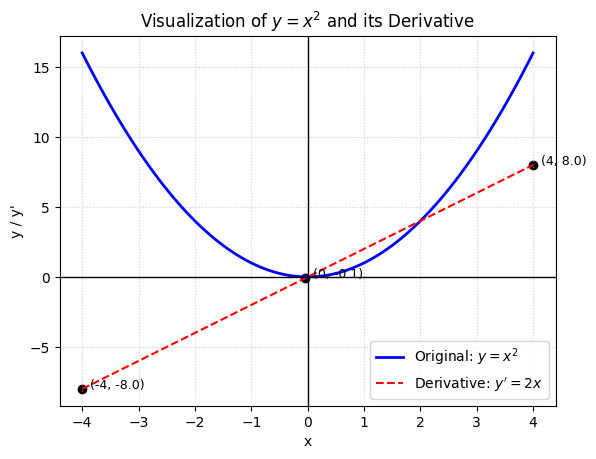

In [53]:
import torch
import matplotlib.pyplot as plt

# 1. x 범위 설정 (-4부터 4까지 100개의 지점)
x = torch.linspace(-4, 4, 100, requires_grad=True)

# 2. 포물선 방정식 정의
y = x**2

# 3. 자동 미분 실행
# y가 벡터이므로 각 요소에 대해 독립적으로 미분하기 위해 ones_like를 전달합니다.
y.backward(torch.ones_like(x))

# 4. 결과값 준비
x_np = x.detach().numpy()
y_np = y.detach().numpy()
grad_np = x.grad.numpy() # 미분값 (2x)

# 5. 시각화

# 원본 함수 y = x^2
plt.plot(x_np, y_np, label='Original: $y = x^2$', color='blue', linewidth=2)

# 미분 함수 y' = 2x
plt.plot(x_np, grad_np, label='Derivative: $y\' = 2x$', color='red', linestyle='--')

# 주요 지점 표시 (예: x= -4, 0, 4)
for val in [-4, 0, 4]:
    idx = (torch.abs(x - val)).argmin()
    plt.scatter(x_np[idx], grad_np[idx], color='black')
    plt.text(x_np[idx], grad_np[idx], f'  ({val}, {grad_np[idx]:.1f})', fontsize=9)

plt.title('Visualization of $y=x^2$ and its Derivative')
plt.xlabel('x')
plt.ylabel('y / y\'')
plt.axhline(0, color='black', lw=1) # x축
plt.axvline(0, color='black', lw=1) # y축
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

## **시간과 속도, 거리에 대하여**
- $s(t) = t^2$ 라는 위치 함수를 생성하고, 모든 지점에서의 미분값(속도)을 계산

시간에 따른 속도(등속도) : tensor([ 0.0000,  0.1010,  0.2020,  0.3030,  0.4040,  0.5051,  0.6061,  0.7071,
         0.8081,  0.9091,  1.0101,  1.1111,  1.2121,  1.3131,  1.4141,  1.5152,
         1.6162,  1.7172,  1.8182,  1.9192,  2.0202,  2.1212,  2.2222,  2.3232,
         2.4242,  2.5253,  2.6263,  2.7273,  2.8283,  2.9293,  3.0303,  3.1313,
         3.2323,  3.3333,  3.4343,  3.5354,  3.6364,  3.7374,  3.8384,  3.9394,
         4.0404,  4.1414,  4.2424,  4.3434,  4.4444,  4.5455,  4.6465,  4.7475,
         4.8485,  4.9495,  5.0505,  5.1515,  5.2525,  5.3535,  5.4545,  5.5556,
         5.6566,  5.7576,  5.8586,  5.9596,  6.0606,  6.1616,  6.2626,  6.3636,
         6.4646,  6.5657,  6.6667,  6.7677,  6.8687,  6.9697,  7.0707,  7.1717,
         7.2727,  7.3737,  7.4747,  7.5758,  7.6768,  7.7778,  7.8788,  7.9798,
         8.0808,  8.1818,  8.2828,  8.3838,  8.4848,  8.5859,  8.6869,  8.7879,
         8.8889,  8.9899,  9.0909,  9.1919,  9.2929,  9.3939,  9.4949,  9.5960,
         9.6970,  9.798

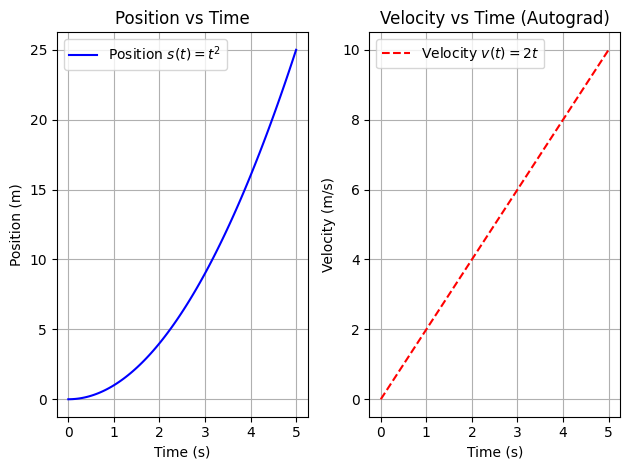

In [52]:
import torch
import matplotlib.pyplot as plt

# 1. 데이터 준비: 0초부터 5초까지 100개의 지점 생성
t = torch.linspace(0, 5, 100, requires_grad=True)

# 2. 위치 함수 정의: s(t) = t^2
# (t가 텐서이므로 s도 텐서가 되며, 연산 그래프가 생성됩니다)
s = t**2

# 3. 자동 미분 (Autograd)
# s는 벡터이므로, 미분(기울기)을 구하기 위해 기준이 되는 1 벡터를 전달합니다.
s.backward(torch.ones_like(t))

# 4. 결과 추출
# t.grad에 ds/dt, 즉 속도(v)가 저장됩니다.
velocity = t.grad
print(f"시간에 따른 속도(등속도) : {velocity}'")

# 시각화를 위해 텐서를 넘파이 배열로 변환
t_np = t.detach().numpy()
s_np = s.detach().numpy()
v_np = velocity.numpy()

# 5. 시각화

# 위치 그래프
plt.subplot(1, 2, 1)
plt.plot(t_np, s_np, label='Position $s(t)=t^2$', color='blue')
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid(True)
plt.legend()

# 속도 그래프 (미분 결과)
plt.subplot(1, 2, 2)
plt.plot(t_np, v_np, label='Velocity $v(t)=2t$', color='red', linestyle='--')
plt.title('Velocity vs Time (Autograd)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()